# 018.00 - Subspaces

### Import

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import spectral.io.aviris as aviris
import matplotlib.tri as mtri
from scipy.spatial.transform import Rotation as rot
from PIL import Image
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d
from skimage import io, color
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle, Circle, Wedge, Polygon
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal as mnorm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Logistic Function

In [3]:
def logistic(x, L=1, xmid=0, k=1):
    
    return L / (1 + np.exp(-k * (x - xmid)))

### Subspace 1

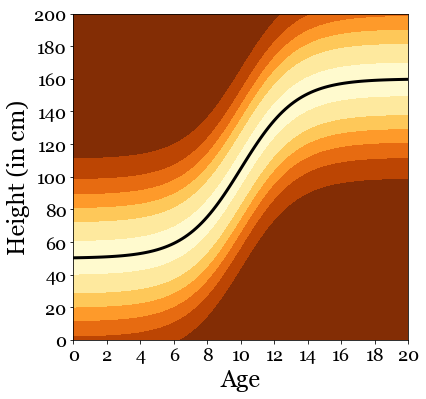

In [4]:
plt.figure(figsize=(6,6))
y = logistic(np.arange(-6, 6.1, 0.1),L=1,xmid=0,k=1)
x = np.linspace(0,20,121)
y = (y * 110) + 50
r = np.linspace(0,200,121)
D = []
for i in range(121):
    distr = mnorm(y[i],1000)
    d = distr.pdf(r)
    D.append(d.T)
D = np.array(D)
plt.contourf(D.T,extent=(0,20,0,200),cmap='YlOrBr_r')
plt.plot(x,y,c='k',linewidth=3)
xticks = np.linspace(0,20,11)
yticks = np.linspace(0,200,11)
plt.xticks(xticks,labels=xticks.astype(int),fontsize=18,**csfont);
plt.yticks(yticks,labels=yticks.astype(int),fontsize=18,**csfont);
plt.xlabel('Age',fontsize=24,**csfont);
plt.ylabel('Height (in cm)',fontsize=24,**csfont);
plt.savefig('../../assets/matplotlib/018_subspaces_1.png',dpi=300,bbox_inches="tight")

### Solve equation of Plane

In [ ]:
def intercept(x,y,a,b,val)

    x*a - y*b = val
    

### Plot Oriented 2D Plane

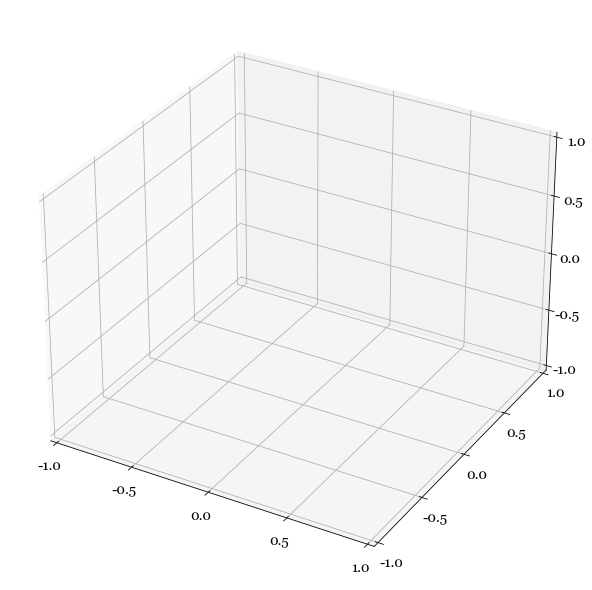

In [13]:
res = 101
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.0,bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.1)
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(np.linspace(-2,2,res),np.linspace(-2,2,res))


#Solve the system of equations x0 + 2 * x1 = 1 and 3 * x0 + 5 * x1 = 2:


a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)

# x = -1
# z = 1

# -1*-2 - y*1.5 = 1
# 2 - y*1.5 = 1
# -y*1.5 = -1
# -y = -1/1.5
# y = 1/1.5



# #Z = X*-2 - Y*1.5

# X[0,:]
# Y[0,:]


# Z[Z > 1] = np.nan
# # Z[Z < -1] = np.nan
# # X[X > 1] = np.nan
# # X[X < -1] = np.nan
# # Y[Y > 1] = np.nan
# # Y[Y < -1] = np.nan
# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
# #                        facecolor=[],alpha=0.5,
# #                        edgecolors='k',linewidth=0.5, antialiased=False,shade=False)
ax.set_yticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.set_xticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
# # ax.view_init(elev=40, azim=60)
# # plt.savefig('../../assets/matplotlib/018_subspaces_2.png',dpi=300,bbox_inches="tight")

### Plot Data from head on (front, left, top)

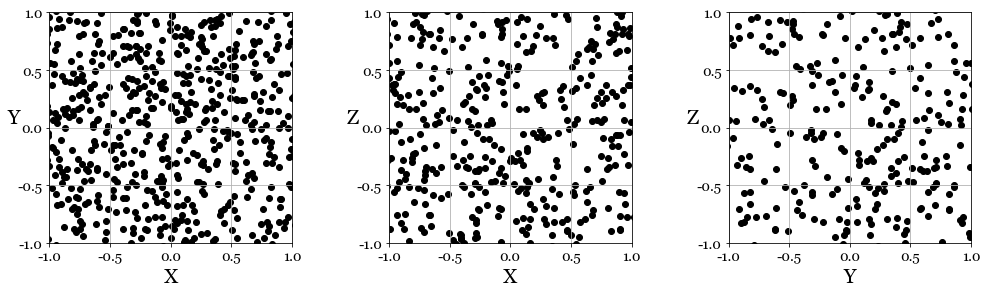

In [15]:
T = (np.random.random((2000,3)) - 0.5) * 4
T[:,2] = T[:,0]*-2 - T[:,1]*1.5

plt.figure(figsize=(16,4))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.subplot(1,3,1)
plt.scatter(T[:,0],T[:,1],c='k')
plt.xlabel('X',**csfont,fontsize=20)
plt.ylabel('Y',**csfont,fontsize=20,rotation=0)
plt.yticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.xticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.grid()
plt.axis((-1,1,-1,1));
plt.subplot(1,3,2)
plt.scatter(T[:,0],T[:,2],c='k')
plt.xlabel('X',**csfont,fontsize=20)
plt.ylabel('Z',**csfont,fontsize=20,rotation=0)
plt.yticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.xticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.grid()
plt.axis((-1,1,-1,1));
plt.subplot(1,3,3)
plt.scatter(T[:,1],T[:,2],c='k');
plt.xlabel('Y',**csfont,fontsize=20)
plt.ylabel('Z',**csfont,fontsize=20,rotation=0)
plt.yticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.xticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
plt.grid();
plt.axis((-1,1,-1,1));
plt.savefig('../../assets/matplotlib/018_subspaces_3.png',dpi=300,bbox_inches="tight");

### Points from an angle

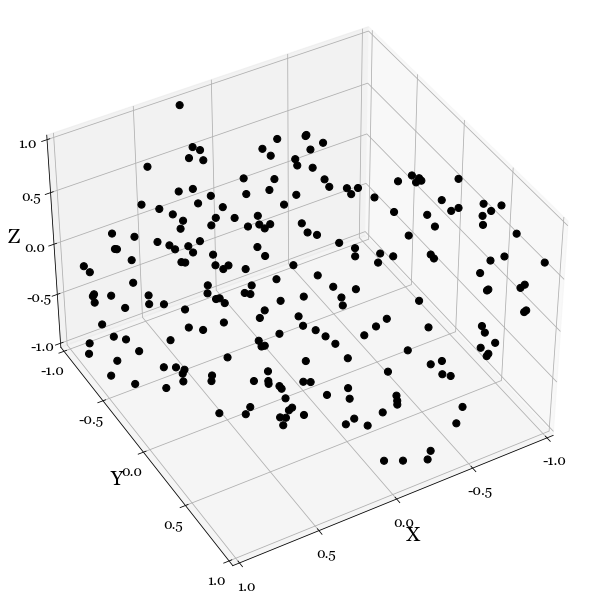

In [14]:
T = (np.random.random((2000,3)) - 0.5) * 4
T[:,2] = T[:,0]*-2 - T[:,1]*1.5
idx = np.where(T[:,0] >-1)[0]
T = T[idx,:]
idx = np.where(T[:,1] >-1)[0]
T = T[idx,:]
idx = np.where(T[:,2] >-1)[0]
T = T[idx,:]
idx = np.where(T[:,0] <1)[0]
T = T[idx,:]
idx = np.where(T[:,1] <1)[0]
T = T[idx,:]
idx = np.where(T[:,2] <1)[0]
T = T[idx,:]

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.0,bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.1)
ax = plt.axes(projection='3d')
ax.scatter(T[:,0],T[:,1],T[:,2],c='k',alpha=1.0,s=50)
ax.set_xlabel('X',**csfont,fontsize=20)
ax.set_ylabel('Y',**csfont,fontsize=20)
ax.set_zlabel('Z',**csfont,fontsize=20)
ax.set_xticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.set_yticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(-1,1,5),labels=np.linspace(-1,1,5),fontsize=14,**csfont);
ax.grid()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.view_init(elev=40, azim=60)
plt.savefig('../../assets/matplotlib/018_subspaces_4.png',dpi=300,bbox_inches="tight");